In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ashishmotwani/tomato")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/tomato


In [2]:
import os

# The main directory for the dataset
data_dir = '/kaggle/input/tomato/'

# List the contents (should show 'train' and 'validation' folders)
print("Dataset contents:", os.listdir(data_dir))

# You can now define your train and validation paths
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'valid')

print("\nTrain directory contents:", os.listdir(train_dir))

Dataset contents: ['valid', 'train']

Train directory contents: ['Late_blight', 'Tomato_Yellow_Leaf_Curl_Virus', 'Septoria_leaf_spot', 'Early_blight', 'Spider_mites Two-spotted_spider_mite', 'powdery_mildew', 'healthy', 'Bacterial_spot', 'Target_Spot', 'Tomato_mosaic_virus', 'Leaf_Mold']


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 1. LOAD THE PRE-TRAINED MODEL
# =======================================
# Load DenseNet201 with its original top layer for ImageNet classification
# The key here is `include_top=True`
print("Loading pre-trained DenseNet201 model...")
model = tf.keras.applications.DenseNet201(
    weights='imagenet',
    include_top=True
)

# You can print the summary to see the full architecture
# model.summary()


2025-09-02 07:26:40.021804: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756798000.244472      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756798000.310841      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading pre-trained DenseNet201 model...


I0000 00:00:1756798013.865338      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


82524592/82524592 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
 model.summary()

Model: "densenet201"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 20,242,984 (77.22 MB)

 Trainable params: 20,013,928 (76.35 MB)

 Non-trainable params: 229,056 (894.75 KB)

In [5]:
import os

# The main directory for the dataset
data_dir = '/kaggle/input/tomato/'

# List the contents (should show 'train' and 'validation' folders)
print("Dataset contents:", os.listdir(data_dir))

# You can now define your train and validation paths
train_dir = os.path.join(data_dir, 'train')

Dataset contents: ['valid', 'train']


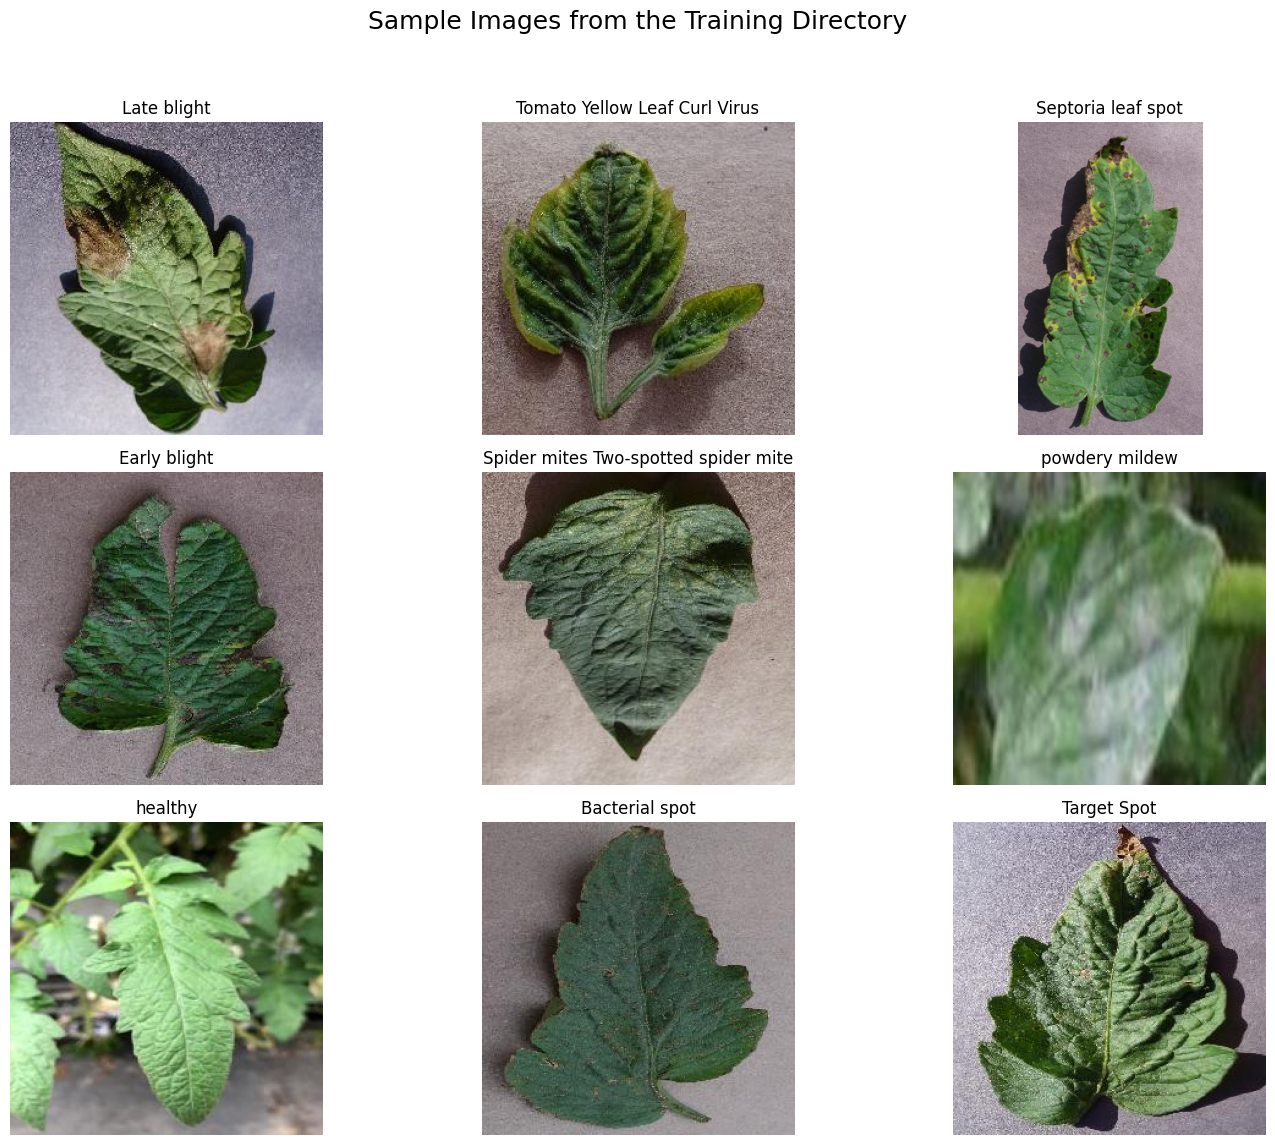

In [6]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to your training directory
train_dir = '/kaggle/input/tomato/train'

# Get the list of all class folders (e.g., 'Tomato___Bacterial_spot', 'Tomato___healthy')
class_folders = os.listdir(train_dir)

# Set up the plot
plt.figure(figsize=(15, 12))

# Loop through a few class folders to display one image from each
for i, class_folder in enumerate(class_folders[:9]): # Display images from the first 9 classes
    # Create a path to the class folder
    folder_path = os.path.join(train_dir, class_folder)
    
    # Get a list of all image files in the folder
    image_files = os.listdir(folder_path)
    
    # Select one random image file from the list
    random_image_file = random.choice(image_files)
    
    # Create the full path to the image
    image_path = os.path.join(folder_path, random_image_file)
    
    # Load the image
    img = mpimg.imread(image_path)
    
    # Create a subplot for the image
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(class_folder.replace("Tomato___", "").replace("_", " "))
    plt.axis('off')

plt.suptitle("Sample Images from the Training Directory", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [7]:
train_dir = '/kaggle/input/tomato/train/'

# Get a list of all class folders (e.g., 'Tomato___Bacterial_spot')
class_folders = os.listdir(train_dir)
# Pick a random class folder 🎲
random_class = random.choice(class_folders)
class_path = os.path.join(train_dir, random_class)

# Get a list of all images in that folder
image_files = os.listdir(class_path)
# Pick a random image file 🎲
random_image = random.choice(image_files)

# Construct the full path to the chosen image
image_path = os.path.join(class_path, random_image)

print(f"Randomly selected image: {image_path}\n")

Randomly selected image: /kaggle/input/tomato/train/Septoria_leaf_spot/septoria-leaf-spot-treatment-leaf-spot-septoria-leaf-spot-soil-treatment-septoria-leaf-spot-tomato-organic-treatment_jpg.rf.a9047bd0cffeeb0e42c54f68d4945b31.jpg



In [8]:
# Load the image, ensuring it's 224x224 pixels
img = tf.keras.utils.load_img(image_path, target_size=(224, 224))

# Convert the image to a NumPy array
img_array = tf.keras.utils.img_to_array(img)

# Add a batch dimension (the model expects a batch of images)
img_batch = np.expand_dims(img_array, axis=0)

# Apply the specific preprocessing required for DenseNet
preprocessed_img = tf.keras.applications.densenet.preprocess_input(img_batch)


In [9]:
print("Classifying the image...")
predictions = model.predict(preprocessed_img)

# Decode the predictions into human-readable ImageNet labels
decoded_predictions = tf.keras.applications.densenet.decode_predictions(predictions, top=5)[0]


Classifying the image...


I0000 00:00:1756798327.827327      99 service.cc:148] XLA service 0x7caa300058a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756798327.828402      99 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1756798330.002882      99 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


I0000 00:00:1756798343.402177      99 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step



Top 5 predictions from ImageNet:
1: walking_stick (15.21%)
2: pot (6.86%)
3: buckeye (6.52%)
4: fig (4.08%)
5: leaf_beetle (3.45%)


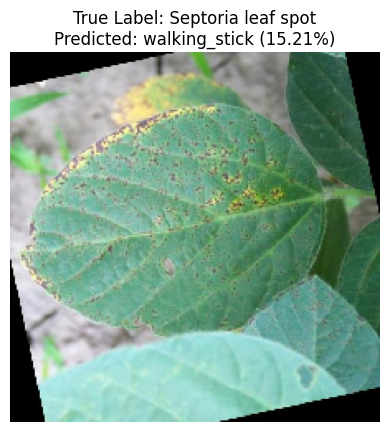

In [10]:
print("\nTop 5 predictions from ImageNet:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i+1}: {label} ({score:.2%})")

# Display the image with its top prediction as the title
top_prediction_label = decoded_predictions[0][1]
top_prediction_score = decoded_predictions[0][2]
plt.imshow(img)
# Also show the true label from the folder name for comparison
true_label = random_class.replace("___", " ").replace("_", " ")
plt.title(f"True Label: {true_label}\nPredicted: {top_prediction_label} ({top_prediction_score:.2%})")
plt.axis('off')
plt.show()